<a href="https://colab.research.google.com/github/Rishit-dagli/GDG-Nashik-2020/blob/master/tfhub_neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Style Transfer

This notebook shows how you could use TensorFlow Hub to very simply build a high performace style transfer algorithm

## What do we want to do

We are trying to paint one image into the texture of other. Some examples-

<img src="https://raw.githubusercontent.com/Rishit-dagli/GDG-Nashik-2020/master/images/style_transfer_eg1.jpg?token=AJOVWYGODT7NKMRDRQFGTUK6ZVEV2">
<br>
<img src="https://raw.githubusercontent.com/Rishit-dagli/GDG-Nashik-2020/master/images/style_transfer_eg2.jpg?token=AJOVWYGCR4P4PY3R4FYVPGK6ZVEY6">

<img src="https://raw.githubusercontent.com/Rishit-dagli/GDG-Nashik-2020/master/images/style_transfer_eg3.jpg?token=AJOVWYCZG4AKLGQP32TW4XS6ZVE3C">

## Imports

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub

## Cloning the repo

In [6]:
!git clone https://github.com/Rishit-dagli/GDG-Nashik-2020.git

Cloning into 'GDG-Nashik-2020'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 77 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.


## Specifying the input images

In [0]:
BASE_CONTENT_DIR = "GDG-Nashik-2020/images/examples/images/"
content_image = ["andrew_ng.jpg", "dog.jpg", "flower.jpg", "flower2.jpg", "mona_lisa.jpg"]
BASE_STYLE_DIR = "GDG-Nashik-2020/images/examples/styles/"
style_image = ["style1.jpg", "style2.jpg", "style3.jpg","style4.jpg", "style5.jpg",]

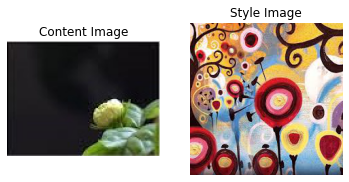

In [15]:
content_img = plt.imread(BASE_CONTENT_DIR + content_image[3])
style_img = plt.imread(BASE_STYLE_DIR + style_image[2])

plt.subplot(1, 2, 1)
plt.title('Content Image')
plt.axis('off')
plt.imshow(content_img)

plt.subplot(1, 2, 2)
plt.title('Style Image')
plt.axis('off')
plt.imshow(style_img)

## Some helper functions

We will define functions which convert an image to tensor and vice versa

In [0]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [720, 512])
    img = img[tf.newaxis, :]
    return img

In [0]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = tensor[0]
    plt.figure(figsize=(20,10))
    plt.axis('off')
    return plt.imshow(tensor)

## Images to tensors

We will now convert our images to tensors, so they can be fed in the network

In [0]:
content_image_tensor = list()
style_image_tensor = list() 
for i in range(len(content_image)):
  content_image_tensor.append(image_to_tensor(BASE_CONTENT_DIR + content_image[i]))
  style_image_tensor.append(image_to_tensor(BASE_STYLE_DIR + style_image[i]))

## Loading the module

We will now load the model from TF Hub, as this is an end to end module there is no need to add any more layers

In [0]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Doing inference

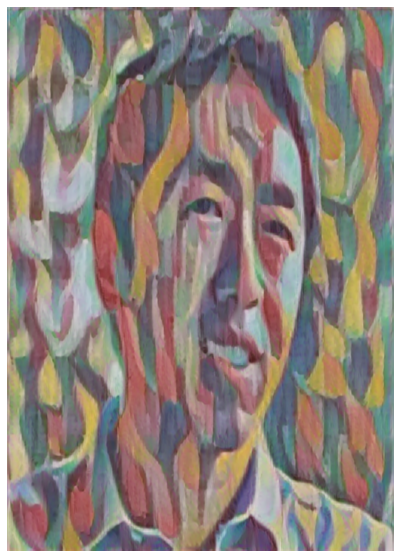

In [22]:
combined_result = hub_module(tf.constant(content_image_tensor[0]), tf.constant(style_image_tensor[1]))[0]
tensor_to_image(combined_result)